In [53]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
book_dir = './Books/'    

In [40]:
def count_words(text): 
    """
    Function to count the unique words from text file. Skip punctuations.
    
    Params: 
        text: Strings
    Return: 
        Return dictionary where keys are unique words and values are counts.
    """
    text = text.lower() 
    skips = [".", ",", ";", ":", " '' ", '""']
    for skip in skips: 
        text = text.replace(skip, "")
        
    word_counts = {}
    for word in text.split(' '):
        if word in word_counts: 
            word_counts[word] += 1 
        else: 
            word_counts[word] = 1 
    return word_counts

In [41]:
def word_stats(word_counts): 
    """
    Function to find the number of unique words and word frequencies. 
    
    Params: 
        word_counts: It is a dictionary where keys are the unique words and values are counts 
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [42]:
def read_book(title_path): 
    """
    Read a book and return as a string 
    Params:
        title_path: path of book file. 
    """
    with open(title_path, "r", encoding='utf8') as current_file: 
        text = current_file.read()
        text = text.replace("\n", "")
        text = text.replace("\t", "")
    return text 
        

In [43]:
text = read_book('./Books/English/shakespeare/Romeo and Juliet.txt')

In [44]:
len(text)

169275

In [46]:
word_counts = count_words(text)

In [47]:
(num_unique, counts) = word_stats(word_counts)

In [48]:
num_unique

5231

In [49]:
sum(counts)

40776

In [30]:
# sub_dir: languages 
os.listdir(book_dir) 

['Portuguese', 'French', 'German', 'English']

In [31]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language): 
        for title in os.listdir(book_dir + "/" + language + "/" + author): 
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)

./Books//Portuguese/branco/Carlota Angela.txt
./Books//Portuguese/branco/Estrellas Prop°cias.txt
./Books//Portuguese/branco/O Regicida.txt
./Books//Portuguese/branco/Estrellas Funestas.txt
./Books//Portuguese/branco/Livro de Consolação.txt
./Books//Portuguese/branco/O que fazem mulheres.txt
./Books//Portuguese/branco/A Neta do Arcediago.txt
./Books//Portuguese/branco/A Queda d'um Anjo.txt
./Books//Portuguese/branco/Lagrimas Abenáoadas.txt
./Books//Portuguese/branco/O Olho de Vidro.txt
./Books//Portuguese/branco/Agulha em Palheiro.txt
./Books//Portuguese/branco/Annos de Prosa.txt
./Books//Portuguese/branco/Amor de Perdição.txt
./Books//Portuguese/branco/Scenas Contemporaneas.txt
./Books//Portuguese/branco/Amor de Salvação.txt
./Books//Portuguese/branco/A Filha do Arcediago.txt
./Books//Portuguese/Queir¢s/Os Maias.txt
./Books//Portuguese/Queir¢s/O Mandarim.txt
./Books//Portuguese/Queir¢s/A Illustre Casa de Ramires.txt
./Books//Portuguese/Queir¢s/A Rel°quia.txt
./Books//Portuguese/

In [52]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language): 
        for title in os.listdir(book_dir + "/" + language + "/" + author): 
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text)) 
            

./Books//Portuguese/branco/Carlota Angela.txt
./Books//Portuguese/branco/Estrellas Prop°cias.txt
./Books//Portuguese/branco/O Regicida.txt
./Books//Portuguese/branco/Estrellas Funestas.txt
./Books//Portuguese/branco/Livro de Consolação.txt
./Books//Portuguese/branco/O que fazem mulheres.txt
./Books//Portuguese/branco/A Neta do Arcediago.txt
./Books//Portuguese/branco/A Queda d'um Anjo.txt
./Books//Portuguese/branco/Lagrimas Abenáoadas.txt
./Books//Portuguese/branco/O Olho de Vidro.txt
./Books//Portuguese/branco/Agulha em Palheiro.txt
./Books//Portuguese/branco/Annos de Prosa.txt
./Books//Portuguese/branco/Amor de Perdição.txt
./Books//Portuguese/branco/Scenas Contemporaneas.txt
./Books//Portuguese/branco/Amor de Salvação.txt
./Books//Portuguese/branco/A Filha do Arcediago.txt
./Books//Portuguese/Queir¢s/Os Maias.txt
./Books//Portuguese/Queir¢s/O Mandarim.txt
./Books//Portuguese/Queir¢s/A Illustre Casa de Ramires.txt
./Books//Portuguese/Queir¢s/A Rel°quia.txt
./Books//Portuguese/

In [55]:
stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))
title_num = 1 
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language): 
        for title in os.listdir(book_dir + "/" + language + "/" + author): 
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text)) 
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1 

In [57]:
stats.head() 

,language,author,title,length,unique
1,Portuguese,branco,Carlota Angela.txt,46927,13467
2,Portuguese,branco,Estrellas Prop°cias.txt,43445,12487
3,Portuguese,branco,O Regicida.txt,50751,14802
4,Portuguese,branco,Estrellas Funestas.txt,46709,13461
5,Portuguese,branco,Livro de Consolação.txt,54151,15883


In [58]:
stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))
title_num = 1 
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language): 
        for title in os.listdir(book_dir + "/" + language + "/" + author): 
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text)) 
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1 

In [60]:
stats.head() 

,language,author,title,length,unique
1,Portuguese,Branco,Carlota Angela,46927,13467
2,Portuguese,Branco,Estrellas Prop°cias,43445,12487
3,Portuguese,Branco,O Regicida,50751,14802
4,Portuguese,Branco,Estrellas Funestas,46709,13461
5,Portuguese,Branco,Livro de Consolação,54151,15883


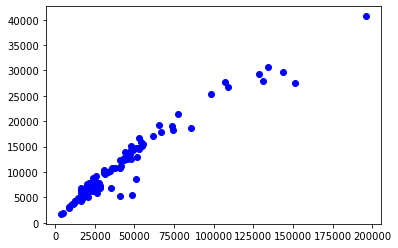

In [63]:
plt.plot(stats.length, stats.unique, 'bo')
plt.show() 

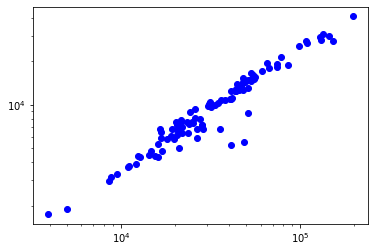

In [64]:
plt.loglog(stats.length, stats.unique, 'bo')
plt.show() 

In [65]:
stats[stats.language == 'English'] 

,language,author,title,length,unique
96,English,Shakespeare,Hamlet,28551,6776
97,English,Shakespeare,Romeo and Juliet,40776,5231
98,English,Shakespeare,A Midsummer Night's Dream,16103,4345
99,English,Shakespeare,The Merchant of Venice,20949,4978
100,English,Shakespeare,Othello,26590,5898
101,English,Shakespeare,Richard III,48315,5541
102,English,Shakespeare,Macbeth,16874,4780


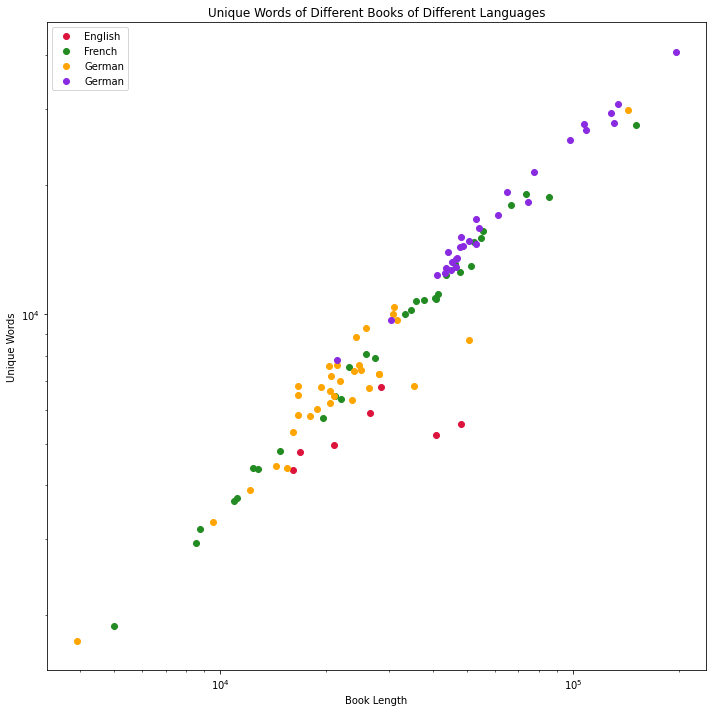

In [68]:
plt.figure(figsize=(10, 10))
subset = stats[stats.language == 'English']
plt.loglog(subset.length, subset.unique, 'o', label="English", color='crimson')

subset = stats[stats.language == 'French']
plt.loglog(subset.length, subset.unique, 'o', label="French", color='forestgreen')


subset = stats[stats.language == 'German']
plt.loglog(subset.length, subset.unique, 'o', label="German", color='orange')


subset = stats[stats.language == 'Portuguese']
plt.loglog(subset.length, subset.unique, 'o', label="German", color='blueviolet')

plt.legend()
plt.xlabel('Book Length')
plt.ylabel('Unique Words')
plt.title('Unique Words of Different Books of Different Languages') 
plt.tight_layout()
plt.savefig('lang_plot.pdf')
plt.show() 